In [20]:
! pip install -r requirements.txt

  Obtaining dependency information for scikeras==0.13.0 from https://files.pythonhosted.org/packages/ea/09/1c02aa24daf7a003c06f629fbb69dc9ae1bda1b247d7b8981e550d752ac9/scikeras-0.13.0-py3-none-any.whl.metadata
  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)
  Obtaining dependency information for numpy==1.26.4 from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Obtaining dependency information for tensorflow==2.15.0 from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1

ERROR: Cannot install -r requirements.txt (line 2), keras==3.2.1 and tensorflow because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [124]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

def dataset(file_name:str = '', dataset:str = 'kdd'):
  return f'dataset/{dataset}/{file_name}'

In [125]:
import os

print(os.listdir(dataset()))

['corrected.gz', 'kddcup.data.gz', 'kddcup.data_10_percent.gz', 'kddcup.names', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'kddcup.testdata.unlabeled.gz', 'kddcup.testdata.unlabeled_10_percent.gz', 'training_attack_types', 'typo-correction.txt']


In [126]:
with open(dataset("kddcup.names"),'r') as f:
  names = f.read()
  features = [name.split(':')[0].strip() for name in names.split('.')][1:-1] + ['target']

len(features) , features

(42,
 ['duration',
  'protocol_type',
  'service',
  'flag',
  'src_bytes',
  'dst_bytes',
  'land',
  'wrong_fragment',
  'urgent',
  'hot',
  'num_failed_logins',
  'logged_in',
  'num_compromised',
  'root_shell',
  'su_attempted',
  'num_root',
  'num_file_creations',
  'num_shells',
  'num_access_files',
  'num_outbound_cmds',
  'is_host_login',
  'is_guest_login',
  'count',
  'srv_count',
  'serror_rate',
  'srv_serror_rate',
  'rerror_rate',
  'srv_rerror_rate',
  'same_srv_rate',
  'diff_srv_rate',
  'srv_diff_host_rate',
  'dst_host_count',
  'dst_host_srv_count',
  'dst_host_same_srv_rate',
  'dst_host_diff_srv_rate',
  'dst_host_same_src_port_rate',
  'dst_host_srv_diff_host_rate',
  'dst_host_serror_rate',
  'dst_host_srv_serror_rate',
  'dst_host_rerror_rate',
  'dst_host_srv_rerror_rate',
  'target'])

In [127]:
attack_types = {'normal': 'normal'}
with open(dataset("training_attack_types"),'r') as f:
  types = f.read()
  attack_types.update({t.split(' ')[0]: t.split(' ')[1] for t in types.split('\n')[:-2]})
len(attack_types), attack_types

(23,
 {'normal': 'normal',
  'back': 'dos',
  'buffer_overflow': 'u2r',
  'ftp_write': 'r2l',
  'guess_passwd': 'r2l',
  'imap': 'r2l',
  'ipsweep': 'probe',
  'land': 'dos',
  'loadmodule': 'u2r',
  'multihop': 'r2l',
  'neptune': 'dos',
  'nmap': 'probe',
  'perl': 'u2r',
  'phf': 'r2l',
  'pod': 'dos',
  'portsweep': 'probe',
  'rootkit': 'u2r',
  'satan': 'probe',
  'smurf': 'dos',
  'spy': 'r2l',
  'teardrop': 'dos',
  'warezclient': 'r2l',
  'warezmaster': 'r2l'})

## KDD

In [108]:
import pandas as pd

df = pd.read_csv(dataset('kddcup.data.gz'),names=features)

df['benign'] = df.target.apply(lambda r: 0 if (r[:-1]=='normal') else 1)
df['Attack Type'] = df.target.apply(lambda r:attack_types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,0,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,0,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,0,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,0,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,0,normal


## NSL

In [128]:
feature_list = ['duration', 'protocol_type' , 'service'  , 'flag' , \
                'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', \
                'urgent', 'hot', 'num_failed_logins', 'logged_in', \
                'num_compromised', 'root_shell', 'su_attempted', \
                'num_root', 'num_file_creations', 'num_shells', \
                'num_access_files', 'num_outbound_cmds', 'is_host_login', \
                'is_guest_login', 'count', 'srv_count', 'serror_rate', \
                'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', \
                'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', \
                'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', \
                'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', \
                'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', \
                'dst_host_srv_serror_rate', 'dst_host_rerror_rate', \
                'dst_host_srv_rerror_rate', 'class', 'difficulty']


df = pd.read_csv(dataset('KDDTrain+.txt', 'nsl'), names=feature_list, index_col=False)


df.rename(columns={'class': 'target'}, inplace=True)  # by name
df['benign'] = df.target.apply(lambda r: 0 if (r=='normal') else 1)
df['Attack Type'] = df.target.apply(lambda r:attack_types[r])
df = df.drop(columns=['difficulty'])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0,normal


# Visualize Dataset

In [25]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

In [29]:
df.shape

(4898431, 44)

target
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64


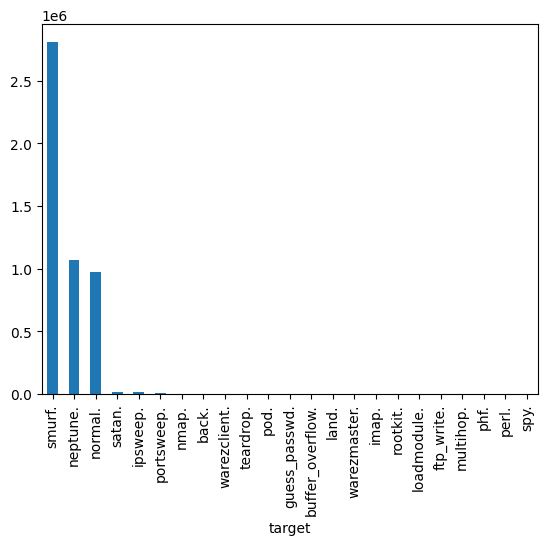

In [30]:
print(df['target'].value_counts())
bar_graph('target')

Attack Type
dos       3883370
normal     972781
probe       41102
r2l          1126
u2r            52
Name: count, dtype: int64


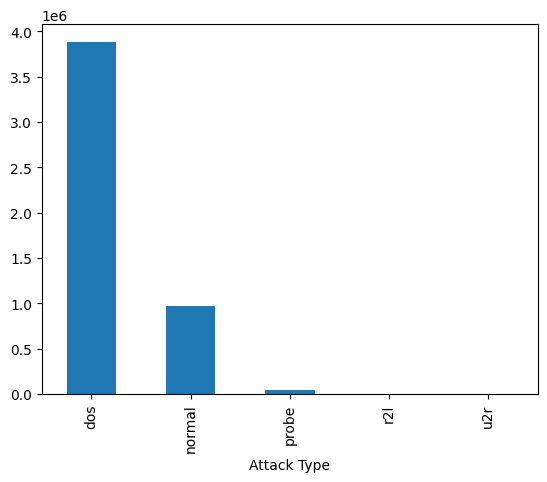

In [17]:
print(df['Attack Type'].value_counts())
bar_graph('Attack Type')

In [ ]:
df.isnull().sum()

In [ ]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

In [ ]:
bar_graph('protocol_type')

In [ ]:
plt.figure(figsize=(15,3))
bar_graph('service')

In [ ]:
bar_graph('flag')

In [ ]:
bar_graph('logged_in')

In [ ]:
len(df.columns)

# Data Cleaning

In [129]:
df = df.dropna(axis='columns')# drop columns with NaN

In [130]:
{col:df[col].nunique() for col in df}

{'duration': 2981,
 'protocol_type': 3,
 'service': 70,
 'flag': 11,
 'src_bytes': 3341,
 'dst_bytes': 9326,
 'land': 2,
 'wrong_fragment': 3,
 'urgent': 4,
 'hot': 28,
 'num_failed_logins': 6,
 'logged_in': 2,
 'num_compromised': 88,
 'root_shell': 2,
 'su_attempted': 3,
 'num_root': 82,
 'num_file_creations': 35,
 'num_shells': 3,
 'num_access_files': 10,
 'num_outbound_cmds': 1,
 'is_host_login': 2,
 'is_guest_login': 2,
 'count': 512,
 'srv_count': 509,
 'serror_rate': 89,
 'srv_serror_rate': 86,
 'rerror_rate': 82,
 'srv_rerror_rate': 62,
 'same_srv_rate': 101,
 'diff_srv_rate': 95,
 'srv_diff_host_rate': 60,
 'dst_host_count': 256,
 'dst_host_srv_count': 256,
 'dst_host_same_srv_rate': 101,
 'dst_host_diff_srv_rate': 101,
 'dst_host_same_src_port_rate': 101,
 'dst_host_srv_diff_host_rate': 75,
 'dst_host_serror_rate': 101,
 'dst_host_srv_serror_rate': 100,
 'dst_host_rerror_rate': 101,
 'dst_host_srv_rerror_rate': 101,
 'target': 23,
 'benign': 2,
 'Attack Type': 5}

## KDD

In [111]:
test_df = pd.read_csv(dataset('corrected.gz'),names=features)

## NSL

In [131]:
test_df = pd.read_csv(dataset('KDDTest+.txt', 'nsl'), names=feature_list, index_col=False)


test_df.rename(columns={'class': 'target'}, inplace=True)
test_df = test_df.drop(columns=['difficulty'])
test_df.shape

(22544, 42)

------------------------------------

In [132]:
print("Number of duplicate records:", df.duplicated().sum())
df = df.drop_duplicates()
df.shape

Number of duplicate records: 0


(125973, 44)

In [133]:
print("Number of duplicate records:", test_df.duplicated().sum())
test_df = test_df.drop_duplicates()
test_df.shape

Number of duplicate records: 0


(22544, 42)

In [134]:
df = df[[col for col in df if df[col].nunique() > 1]]

In [152]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
125968,0,1,49,5,0,0,0,0,0,0,...,0.0,255,25,0.10,0.06,0.00,0.0,1.0,0.00,0.0
125969,8,2,49,9,105,145,0,0,0,0,...,0.0,255,244,0.96,0.01,0.01,0.0,0.0,0.00,0.0
125970,0,1,54,9,2231,384,0,0,0,0,...,0.0,255,30,0.12,0.06,0.00,0.0,0.0,0.01,0.0
125971,0,1,30,5,0,0,0,0,0,0,...,0.0,255,8,0.03,0.05,0.00,0.0,1.0,0.00,0.0
125972,0,1,20,9,151,0,0,0,0,0,...,0.0,255,77,0.30,0.03,0.30,0.0,0.0,0.00,0.0


In [136]:
set(test_df.target) - set(df.target)

{'apache2',
 'httptunnel',
 'mailbomb',
 'mscan',
 'named',
 'processtable',
 'ps',
 'saint',
 'sendmail',
 'snmpgetattack',
 'snmpguess',
 'sqlattack',
 'udpstorm',
 'worm',
 'xlock',
 'xsnoop',
 'xterm'}

In [137]:
attack_types['apache2'] = 'dos'
attack_types['mailbomb'] = 'dos'
attack_types['processtable'] = 'dos'
attack_types['udpstorm'] = 'dos'
attack_types['named'] = 'r2l'
attack_types['sendmail'] = 'r2l'
attack_types['snmpgetattack'] = 'r2l'
attack_types['snmpguess'] = 'r2l'
attack_types['worm'] = 'r2l'
attack_types['xsnoop'] = 'r2l'
attack_types['xlock'] = 'r2l'
attack_types['httptunnel'] = 'u2r'
attack_types['xterm'] = 'u2r'
attack_types['sqlattack'] = 'u2r'
attack_types['ps'] = 'u2r'
attack_types['saint'] = 'probe'
attack_types['mscan'] = 'probe'

## KDD

In [117]:
test_df['benign'] = test_df.target.apply(lambda r: 0 if (r[:-1]=='normal') else 1)
test_df['Attack Type'] = test_df.target.apply(lambda r:attack_types[r[:-1]])

## NSL

In [138]:
test_df['benign'] = test_df.target.apply(lambda r: 0 if (r=='normal') else 1)
test_df['Attack Type'] = test_df.target.apply(lambda r:attack_types[r])

---

In [139]:
test_df = test_df[df.columns]
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,1,dos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,1,dos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,0,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,1,probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,1,probe


In [140]:
from sklearn.preprocessing import LabelEncoder

combined_df = pd.concat([df, test_df], ignore_index=True)

label_encoders = {}

string_categorical_columns = ['Attack Type', 'protocol_type', 'flag', 'service', 'target']
for column in string_categorical_columns:
	label_encoders[column] = LabelEncoder()
	combined_df[column] = label_encoders[column].fit_transform(combined_df[column])
	print(column, label_encoders[column].classes_)

df = combined_df.iloc[:len(df)]
test_df = combined_df.iloc[len(df):]

df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

del combined_df

Attack Type ['dos' 'normal' 'probe' 'r2l' 'u2r']
protocol_type ['icmp' 'tcp' 'udp']
flag ['OTH' 'REJ' 'RSTO' 'RSTOS0' 'RSTR' 'S0' 'S1' 'S2' 'S3' 'SF' 'SH']
service ['IRC' 'X11' 'Z39_50' 'aol' 'auth' 'bgp' 'courier' 'csnet_ns' 'ctf'
 'daytime' 'discard' 'domain' 'domain_u' 'echo' 'eco_i' 'ecr_i' 'efs'
 'exec' 'finger' 'ftp' 'ftp_data' 'gopher' 'harvest' 'hostnames' 'http'
 'http_2784' 'http_443' 'http_8001' 'imap4' 'iso_tsap' 'klogin' 'kshell'
 'ldap' 'link' 'login' 'mtp' 'name' 'netbios_dgm' 'netbios_ns'
 'netbios_ssn' 'netstat' 'nnsp' 'nntp' 'ntp_u' 'other' 'pm_dump' 'pop_2'
 'pop_3' 'printer' 'private' 'red_i' 'remote_job' 'rje' 'shell' 'smtp'
 'sql_net' 'ssh' 'sunrpc' 'supdup' 'systat' 'telnet' 'tftp_u' 'tim_i'
 'time' 'urh_i' 'urp_i' 'uucp' 'uucp_path' 'vmnet' 'whois']
target ['apache2' 'back' 'buffer_overflow' 'ftp_write' 'guess_passwd'
 'httptunnel' 'imap' 'ipsweep' 'land' 'loadmodule' 'mailbomb' 'mscan'
 'multihop' 'named' 'neptune' 'nmap' 'normal' 'perl' 'phf' 'pod'
 'portsweep

In [141]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,1,20,9,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,16,0,1
1,0,2,44,9,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,16,0,1
2,0,1,49,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,14,1,0
3,0,1,24,9,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,16,0,1
4,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16,0,1


# Corr

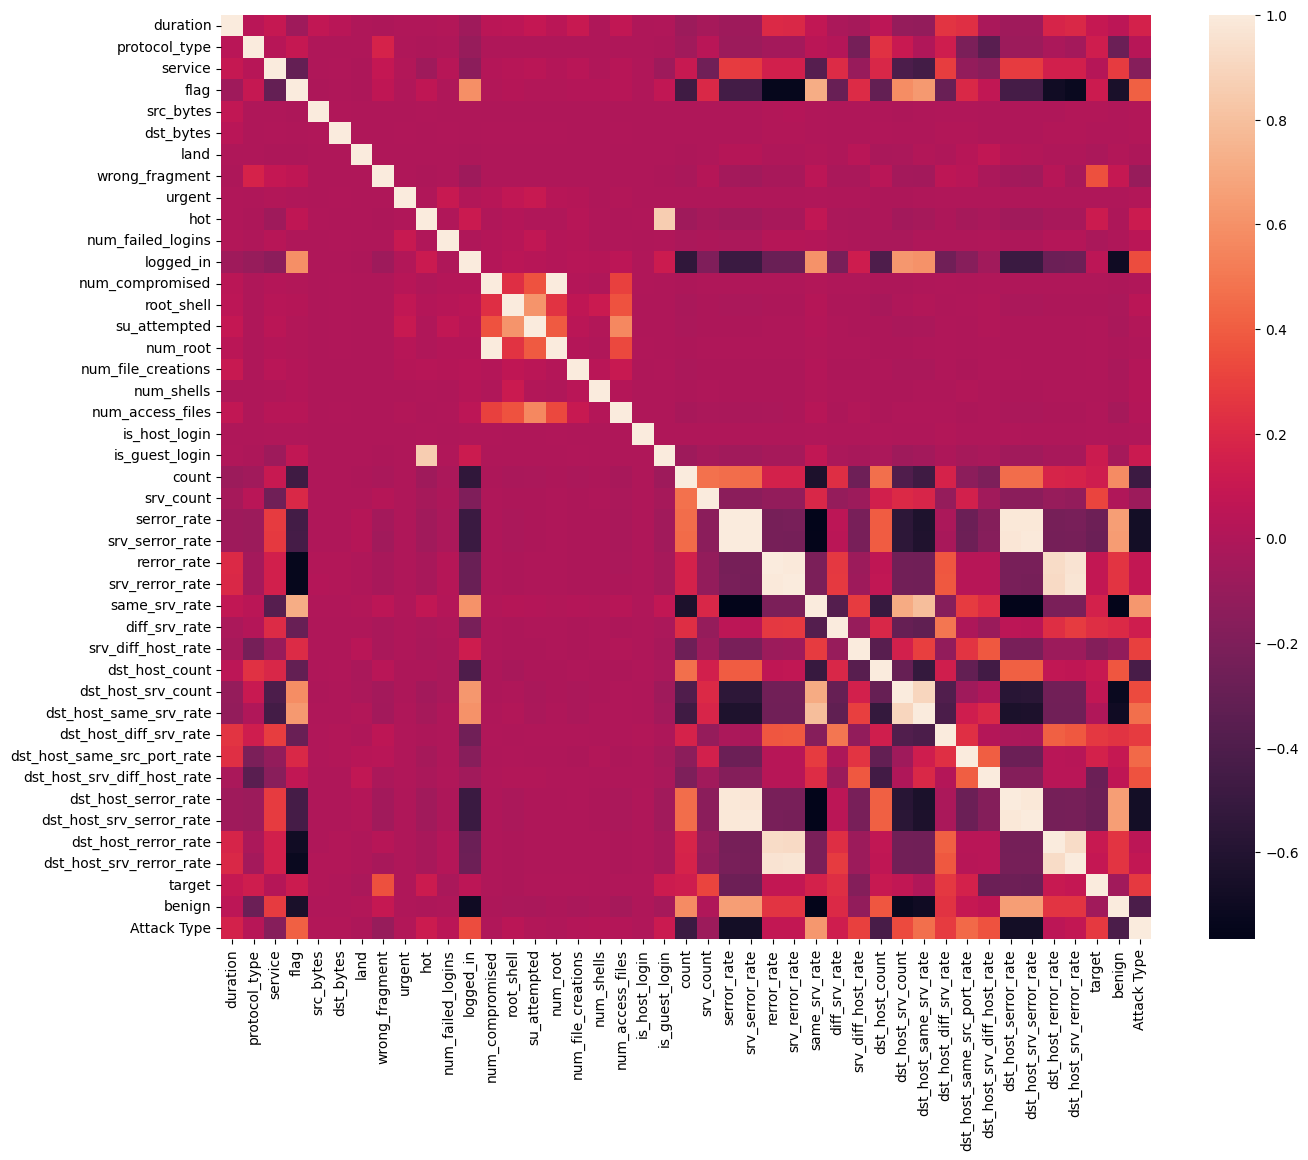

In [142]:
corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()


In [ ]:
corr['target']

In [143]:
label_cols = ['target', 'Attack Type', 'benign']

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
np.fill_diagonal(mask, True)
corr_matrix = corr.mask(mask)

threshold = 0.95

high_corr_features = ((corr_matrix.abs() > threshold) & (corr_matrix != 1)).any()

to_drop = high_corr_features[high_corr_features].index
to_drop = to_drop.drop(label_cols, errors='ignore')

df = df.drop(columns=to_drop)
test_df = test_df.drop(columns=to_drop)
len(to_drop), to_drop

(6,
 Index(['num_compromised', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
        'srv_rerror_rate', 'dst_host_serror_rate'],
       dtype='object'))

In [ ]:
# print(df.shape)

# for f,value in corr[label_col].items():
#   if abs(value) > 0.6 and f!=label_col:
#     df.drop(f,axis = 1, inplace=True)
#     print('dropped', f)
# df.shape

In [ ]:
df['service'].corr(df[label_cols[0]])

In [ ]:
df.head()

In [144]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

is_host_login                  2.817483e-03
land                           1.408607e-02
urgent                         1.436603e-02
num_shells                     2.218113e-02
root_shell                     3.660284e-02
su_attempted                   4.515438e-02
num_failed_logins              4.523914e-02
is_guest_login                 9.661233e-02
num_access_files               9.936956e-02
dst_host_srv_diff_host_rate    1.125638e-01
diff_srv_rate                  1.803144e-01
dst_host_diff_srv_rate         1.889218e-01
wrong_fragment                 2.535300e-01
srv_diff_host_rate             2.598305e-01
dst_host_rerror_rate           3.065575e-01
dst_host_same_src_port_rate    3.089971e-01
dst_host_srv_rerror_rate       3.194594e-01
protocol_type                  4.266196e-01
same_srv_rate                  4.396229e-01
dst_host_srv_serror_rate       4.456691e-01
dst_host_same_srv_rate         4.489494e-01
num_file_creations             4.839351e-01
logged_in                      4

In [145]:
df.to_csv(dataset('dataset_nsl.csv', 'csvs'), index=False)
test_df.to_csv(dataset('test_dataset_nsl.csv', 'csvs'), index=False)

# Load data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

def dataset(file_name:str = '', dataset:str = 'kdd'):
  return f'dataset/{dataset}/{file_name}'

In [34]:
df = pd.read_csv(dataset('dataset_nsl.csv', 'csvs'))
test_df = pd.read_csv(dataset('test_dataset_nsl.csv', 'csvs'))
df.shape, test_df.shape

((125973, 37), (22544, 37))

In [3]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,1,49,1,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,1.00,1.00,14,1,0
1,0,1,49,1,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,1.00,1.00,14,1,0
2,2,1,20,9,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.00,0.00,16,0,1
3,0,0,14,9,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.00,0.00,24,1,2
4,1,1,60,2,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.83,0.71,11,1,2


In [151]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,20,9,491,0,0,0,0,0,...,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.05,0.00
1,0,2,44,9,146,0,0,0,0,0,...,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00
2,0,1,49,5,0,0,0,0,0,0,...,0.00,255,26,0.10,0.05,0.00,0.00,1.00,0.00,0.00
3,0,1,24,9,232,8153,0,0,0,0,...,0.00,30,255,1.00,0.00,0.03,0.04,0.01,0.00,0.01
4,0,1,24,9,199,420,0,0,0,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [35]:
label_col = 'Attack Type'
label_cols = ['Attack Type','target','benign']
label_cols.remove(label_col)

In [36]:
df = df.drop(label_cols, axis=1)
test_df = test_df.drop(label_cols, axis=1)

In [37]:
# Y = df[[label_col]]
# X = df.drop([label_col], axis=1)
Y_train = df[[label_col]]
X_train = df.drop([label_col], axis=1)
df = df.drop([label_col], axis=1)

In [38]:
Y_test = test_df[[label_col]]
X_test = test_df.drop([label_col], axis=1)
test_df = test_df.drop([label_col], axis=1)

In [39]:
X_test.shape

(22544, 34)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=273, shuffle=True)
print('Train', X_train.shape, Y_train.shape)
print('Validation', X_val.shape, Y_val.shape)
print('Test', X_test.shape, Y_test.shape)

Train (113375, 34) (113375, 1)
Validation (12598, 34) (12598, 1)
Test (22544, 34) (22544, 1)


In [41]:
from keras.utils import to_categorical

label_cat_count = len(set(Y_test[label_col]))
print(label_cat_count)

Y_train_one_hot = to_categorical(Y_train, num_classes=label_cat_count)
Y_val_one_hot = to_categorical(Y_val, num_classes=label_cat_count)
Y_test_one_hot = to_categorical(Y_test, num_classes=label_cat_count)

5


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

def fit(model, X_train = X_train, Y_train = Y_train):
  name = type(model).__name__
  start_time = time.time()
  model.fit(X_train, Y_train.values.ravel())
  end_time = time.time()
  print(f"{name}: Training time: ",end_time-start_time)

def fit_evaluate(model, X_train = X_train, Y_train = Y_train, X_val=X_val, Y_val=Y_val, X_test=X_test):
  name = type(model).__name__
  fit(model, X_train, Y_train)

  start_time = time.time()
  Y_test_pred = model.predict(X_test)
  # Y_val_pred = model.predict(X_val)
  end_time = time.time()
  print(f"{name}: Testing time: ",end_time-start_time)

  print(f"{name}: Train score is:", model.score(X_train, Y_train))
  print(f"{name}: Validation score is:", model.score(X_val,Y_val))
  print(f"{name}: Test score is:", model.score(X_test,Y_test))

  print(classification_report(Y_test, Y_test_pred))

  conf_matrix = confusion_matrix(Y_test, Y_test_pred)
  TN, FP = conf_matrix[0][0], conf_matrix[0][1]
  false_alarm_rate = FP / (FP + TN)
  print(f"{name}: False Alarm rate is:", false_alarm_rate)


# Models

In [55]:
X_train_tmp, X_val_tmp, X_test_tmp  = X_train, X_val, X_test

In [97]:
from sklearn.naive_bayes import GaussianNB
fit_evaluate(GaussianNB(),
              X_train=X_train_tmp, X_val=X_val_tmp, X_test=X_test_tmp)

GaussianNB: Training time:  0.03647494316101074
GaussianNB: Testing time:  0.012478113174438477
GaussianNB: Train score is: 0.9266945975744212
GaussianNB: Validation score is: 0.9297507540879505
GaussianNB: Test score is: 0.7193488289567069
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      7458
           1       0.66      0.93      0.77      9711
           2       0.58      0.84      0.69      2421
           3       0.65      0.01      0.02      2754
           4       0.52      0.17      0.26       200

    accuracy                           0.72     22544
   macro avg       0.68      0.53      0.51     22544
weighted avg       0.75      0.72      0.68     22544

GaussianNB: False Alarm rate is: 0.2509197939661516


In [98]:
from sklearn.tree import DecisionTreeClassifier
fit_evaluate(DecisionTreeClassifier(criterion="entropy"),
              X_train=X_train_tmp, X_val=X_val_tmp, X_test=X_test_tmp)

DecisionTreeClassifier: Training time:  1.2111687660217285
DecisionTreeClassifier: Testing time:  0.0007469654083251953
DecisionTreeClassifier: Train score is: 0.9998941565600882
DecisionTreeClassifier: Validation score is: 0.9902365454834101
DecisionTreeClassifier: Test score is: 0.7464957416607523
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      7458
           1       0.65      0.98      0.78      9711
           2       0.83      0.59      0.69      2421
           3       0.77      0.06      0.11      2754
           4       0.47      0.07      0.12       200

    accuracy                           0.75     22544
   macro avg       0.73      0.49      0.51     22544
weighted avg       0.78      0.75      0.71     22544

DecisionTreeClassifier: False Alarm rate is: 0.22123893805309736


In [99]:
from sklearn.svm import SVC
fit_evaluate(SVC(gamma = 'scale'),
              X_train=X_train_tmp, X_val=X_val_tmp, X_test=X_test_tmp)

SVC: Training time:  73.64619088172913
SVC: Testing time:  19.97177481651306
SVC: Train score is: 0.9651157662624035
SVC: Validation score is: 0.9671376408953802
SVC: Test score is: 0.7246717530163236
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      7458
           1       0.62      0.98      0.76      9711
           2       0.87      0.56      0.68      2421
           3       0.68      0.01      0.01      2754
           4       0.73      0.04      0.08       200

    accuracy                           0.72     22544
   macro avg       0.77      0.46      0.47     22544
weighted avg       0.77      0.72      0.68     22544

SVC: False Alarm rate is: 0.2648961984362362


In [100]:
from sklearn.linear_model import LogisticRegression
fit_evaluate(LogisticRegression(max_iter=1200000),
              X_train=X_train_tmp, X_val=X_val_tmp, X_test=X_test_tmp)

LogisticRegression: Training time:  1.209317684173584
LogisticRegression: Testing time:  0.0
LogisticRegression: Train score is: 0.9446262403528115
LogisticRegression: Validation score is: 0.9509445943800603
LogisticRegression: Test score is: 0.7033800567778566
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      7458
           1       0.62      0.94      0.75      9711
           2       0.74      0.63      0.68      2421
           3       0.33      0.00      0.00      2754
           4       0.95      0.10      0.18       200

    accuracy                           0.70     22544
   macro avg       0.71      0.47      0.48     22544
weighted avg       0.70      0.70      0.66     22544

LogisticRegression: False Alarm rate is: 0.2746853146853147


In [101]:
from sklearn.ensemble import GradientBoostingClassifier
fit_evaluate(GradientBoostingClassifier(random_state=220),
              X_train=X_train_tmp, X_val=X_val_tmp, X_test=X_test_tmp)

GradientBoostingClassifier: Training time:  134.4315173625946
GradientBoostingClassifier: Testing time:  0.10009360313415527
GradientBoostingClassifier: Train score is: 0.9817772877618522
GradientBoostingClassifier: Validation score is: 0.9820606445467535
GradientBoostingClassifier: Test score is: 0.7437899219304471
              precision    recall  f1-score   support

           0       0.97      0.75      0.85      7458
           1       0.65      0.98      0.78      9711
           2       0.81      0.64      0.71      2421
           3       0.93      0.04      0.08      2754
           4       0.83      0.07      0.14       200

    accuracy                           0.74     22544
   macro avg       0.84      0.50      0.51     22544
weighted avg       0.81      0.74      0.70     22544

GradientBoostingClassifier: False Alarm rate is: 0.22883797503086845


In [102]:
from sklearn.ensemble import RandomForestClassifier
fit_evaluate(RandomForestClassifier(n_estimators=100),
              X_train=X_train_tmp, X_val=X_val_tmp, X_test=X_test_tmp)

RandomForestClassifier: Training time:  33.239954710006714
RandomForestClassifier: Testing time:  0.19972777366638184
RandomForestClassifier: Train score is: 0.9998941565600882
RandomForestClassifier: Validation score is: 0.99237974281632
RandomForestClassifier: Test score is: 0.74361249112846
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      7458
           1       0.64      0.98      0.77      9711
           2       0.89      0.62      0.73      2421
           3       0.86      0.02      0.03      2754
           4       0.88      0.07      0.14       200

    accuracy                           0.74     22544
   macro avg       0.85      0.49      0.50     22544
weighted avg       0.80      0.74      0.70     22544

RandomForestClassifier: False Alarm rate is: 0.23581607959128797


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
fit_evaluate(AdaBoostClassifier(random_state=387),
              X_train=X_train_tmp, X_val=X_val_tmp, X_test=X_test_tmp)

## NN

In [103]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization
from scikeras.wrappers import KerasClassifier
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.metrics import Accuracy
import gc
from keras.callbacks import EarlyStopping


keras.backend.clear_session()

try:
  del kerasModel
  gc.collect()
  del ann
  gc.collect()
except:
  pass

kerasModel = Sequential(
	[
		Input(shape=(X_train_tmp.shape[1],)),
		Dense(32, activation='sigmoid', kernel_initializer='he_uniform'),
    	BatchNormalization(),
    	Dropout(0.2),
		Dense(16, activation='sigmoid', kernel_initializer='he_uniform'),
    	BatchNormalization(),
    	Dropout(0.2),
		Dense(label_cat_count, activation='softmax')
	]
)

kerasModel.compile(optimizer = 'adam', loss='categorical_crossentropy',metrics = ['accuracy'])

kerasModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 965 (3.77 KB)

 Trainable params: 869 (3.39 KB)

 Non-trainable params: 96 (384.00 B)

In [104]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.001, 
    patience=10, 
    verbose=1, 
    mode='min', 
    restore_best_weights=False
)


start_time = time.time()
kerasModel.fit(X_train_tmp, Y_train_one_hot, 
               validation_data=(X_val_tmp, Y_val_one_hot), 
               epochs=100,
               batch_size=64, 
               callbacks=[early_stopping])
end_time = time.time()
print(f"ANN: Training time: ",end_time-start_time)

ann_train_pred = kerasModel.predict(X_train_tmp)
ann_val_pred = kerasModel.predict(X_val_tmp)
ann_test_pred = kerasModel.predict(X_test_tmp)

ann_train_pred_scalar = np.argmax(ann_train_pred, axis=1)
ann_val_pred_scalar = np.argmax(ann_val_pred, axis=1)
ann_test_pred_scalar = np.argmax(ann_test_pred, axis=1)

print('Train accuracy:', accuracy_score(Y_train,ann_train_pred_scalar))
print('Val accuracy:', accuracy_score(Y_val,ann_val_pred_scalar))
print('Test accuracy:', accuracy_score(Y_test,ann_test_pred_scalar))

print(classification_report(Y_test, ann_test_pred_scalar))


conf_matrix = confusion_matrix(Y_test, ann_test_pred_scalar)
TN, FP = conf_matrix[0][0], conf_matrix[0][1]
false_alarm_rate = FP / (FP + TN)
print(f"False Alarm rate is:", false_alarm_rate)

Epoch 1/100


1772/1772 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8872 - loss: 0.3969 - val_accuracy: 0.9568 - val_loss: 0.1276
Epoch 2/100
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9476 - loss: 0.1689 - val_accuracy: 0.9593 - val_loss: 0.1156
Epoch 3/100
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9477 - loss: 0.1566 - val_accuracy: 0.9606 - val_loss: 0.1120
Epoch 4/100
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9493 - loss: 0.1524 - val_accuracy: 0.9620 - val_loss: 0.1048
Epoch 5/100
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9521 - loss: 0.1414 - val_accuracy: 0.9624 - val_loss: 0.1011
Epoch 6/100
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9526 - loss: 0.1382 - val_accuracy: 0.9628 - val_loss: 0.0980
Epoch 7/100
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9547 - loss: 0.1336 - val_accuracy: 0.9617 - val_loss: 0.0950
Epoch 8/100
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9536 - loss: 0.1340 - val_

c:\Users\Reza\anaconda3\envs\tmp\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Reza\anaconda3\envs\tmp\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Reza\anaconda3\envs\tmp\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Dimension Reduction

### Non-Symmetric Deep Auto-Encoder (NDAE)

In [66]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras.models import Model
from keras.layers import Dense, Input, Dropout, BatchNormalization
from scikeras.wrappers import KerasClassifier
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.metrics import Accuracy
import gc
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping
from keras.losses import MeanSquaredError

keras.backend.clear_session()


In [160]:
Y_train_one_hot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [67]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.001, 
    patience=10,
    verbose=1, 
    mode='min', 
    restore_best_weights=False
)

input_layer1 = Input(shape=(X_train.shape[1],))
encoded1 = Dense(14, activation='sigmoid')(input_layer1)
encoded1 = Dense(28, activation='sigmoid')(encoded1)
encoded1 = Dense(28, activation='sigmoid')(encoded1)
output_layer1 = Dense(X_train.shape[1], activation='sigmoid')(encoded1)  # Output layer size same as input
# Decoder part to reconstruct the input

autoencoder1  = Model(inputs=input_layer1, outputs=output_layer1)
autoencoder1.compile(optimizer='adam', loss='mse')

autoencoder1.fit(X_train, X_train, epochs=200, batch_size=64, shuffle=True,validation_data=(X_val, X_val), 
               callbacks=[early_stopping])

encoder1  = Model(inputs=input_layer1, outputs=encoded1)

X_train_transformed1 = encoder1.predict(X_train)
X_test_transformed1 = encoder1.predict(X_test)
X_val_transformed1 = encoder1.predict(X_val)

pred_train1 = autoencoder1.predict(X_train)
pred_val1 = autoencoder1.predict(X_val)
pred_test1 = autoencoder1.predict(X_test)


reconstruction_error = MeanSquaredError()
print('Train error:', reconstruction_error(X_train,pred_train1).numpy())
print('Val error:', reconstruction_error(X_val,pred_val1).numpy())
print('Test error:', reconstruction_error(X_test,pred_test1).numpy())


Epoch 1/200


1772/1772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0638 - val_loss: 0.0269
Epoch 2/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0232 - val_loss: 0.0137
Epoch 3/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0127 - val_loss: 0.0074
Epoch 4/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0066 - val_loss: 0.0046
Epoch 5/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0044 - val_loss: 0.0036
Epoch 6/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 7/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 8/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 9/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 10/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 11/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 12/200
1772/1772 ━━━━━━━━

In [68]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.001, 
    patience=10, 
    verbose=1, 
    mode='min', 
    restore_best_weights=False
)

input_layer2 = Input(shape=(28,))
encoded2 = Dense(14, activation='sigmoid')(input_layer2)
encoded2 = Dense(28, activation='sigmoid')(encoded2)
encoded2 = Dense(28, activation='sigmoid')(encoded2)
output_layer2 = Dense(X_train.shape[1], activation='sigmoid')(encoded2)  # Output layer size same as input

autoencoder2  = Model(inputs=input_layer2, outputs=output_layer2)
autoencoder2.compile(optimizer='adam', loss='mse')

autoencoder2.fit(X_train_transformed1, X_train, epochs=200, batch_size=64, shuffle=True,
                 validation_data=(X_val_transformed1, X_val), 
               callbacks=[early_stopping])

encoder2  = Model(inputs=input_layer2, outputs=encoded2)
X_train_transformed2 = encoder2.predict(X_train_transformed1)
X_test_transformed2 = encoder2.predict(X_test_transformed1)
X_val_transformed2 = encoder2.predict(X_val_transformed1)


pred_train2 = autoencoder2.predict(X_train_transformed1)
pred_val2 = autoencoder2.predict(X_val_transformed1)
pred_test2 = autoencoder2.predict(X_test_transformed1)


reconstruction_error = MeanSquaredError()
print('Train error:', reconstruction_error(X_train,pred_train2).numpy())
print('Val error:', reconstruction_error(X_val,pred_val2).numpy())
print('Test error:', reconstruction_error(X_test,pred_test2).numpy())

Epoch 1/200


1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0697 - val_loss: 0.0270
Epoch 2/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0237 - val_loss: 0.0122
Epoch 3/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0109 - val_loss: 0.0076
Epoch 4/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0071 - val_loss: 0.0053
Epoch 5/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0050 - val_loss: 0.0038
Epoch 6/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 7/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 8/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 9/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 10/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 11/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 12/200
1772/1772 ━━━━━━━━

In [69]:
X_train_tmp, X_val_tmp, X_test_tmp = X_train_transformed2, X_val_transformed2, X_test_transformed2

### PCA

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_train_tmp = pca.fit_transform(X_train)
X_val_tmp = pca.transform(X_val)
X_test_tmp = pca.transform(X_test)

len(pca.components_)

20

### LDA

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_train_tmp = lda.fit_transform(X_train, Y_train.values.ravel())
X_val_tmp = lda.transform(X_val)
X_test_tmp = lda.transform(X_test)

len(lda.classes_), X_train_tmp.shape

(5, (113375, 4))

### t-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE()
X_train_tmp = tsne.fit_transform(X_train, Y_train)
X_val_tmp = tsne.transform(X_val)
X_test_tmp = tsne.transform(X_test)

len(tsne.embedding_)

# Versions

In [206]:
!! pip --version

['pip 24.0 from c:\\Users\\rezaab\\Projects\\IntrusionDetection-KDD\\.venv\\Lib\\site-packages\\pip (python 3.11)',
 '']

In [205]:
!! pip list

['Package                      Version',
 '---------------------------- -----------',
 'absl-py                      2.1.0',
 'asttokens                    2.4.1',
 'astunparse                   1.6.3',
 'cachetools                   5.3.3',
 'certifi                      2024.2.2',
 'charset-normalizer           3.3.2',
 'colorama                     0.4.6',
 'comm                         0.2.2',
 'contourpy                    1.2.1',
 'cycler                       0.12.1',
 'debugpy                      1.8.1',
 'decorator                    5.1.1',
 'executing                    2.0.1',
 'flatbuffers                  24.3.25',
 'fonttools                    4.51.0',
 'gast                         0.5.4',
 'google-auth                  2.29.0',
 'google-auth-oauthlib         1.2.0',
 'google-pasta                 0.2.0',
 'grpcio                       1.62.1',
 'h5py                         3.11.0',
 'idna                         3.7',
 'ipykernel                    6.29.4',
 'ipytho